# Model testing and validation

This notebook will test and validate all implemented models (e.g., the gradient_descent optimizer and LogisticRegression) using a small synthetic 2‑feature classification dataset.

- Objectives: train models, evaluate performance, and visualize decision boundaries.
- Steps included: data loading → model instantiation → training (fit) → evaluation on training set (predictions, accuracy) → visualization → evaluation on test set.
- Metrics & checks: accuracy (add confusion matrix / precision/recall if needed), decision-boundary plots, and test predictions.
- Reproducibility: set random seeds where applicable and run cells in order.

In [1]:
# Imports 
# Standard library imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Local application imports

from Optimizers.GradientDescent  import GradientDescent
from Models.LinearRegression import LinearRegression
from Models.LogisticRegression import LogisticRegression
from Models.KNN import KNN
from Models.LinearSVM import LinearSVM
from Losses.MSE import MSE
from Losses.BinaryCrossEntropy import BinaryCrossEntropy

--- 
# Lets first test the Logistic Regression

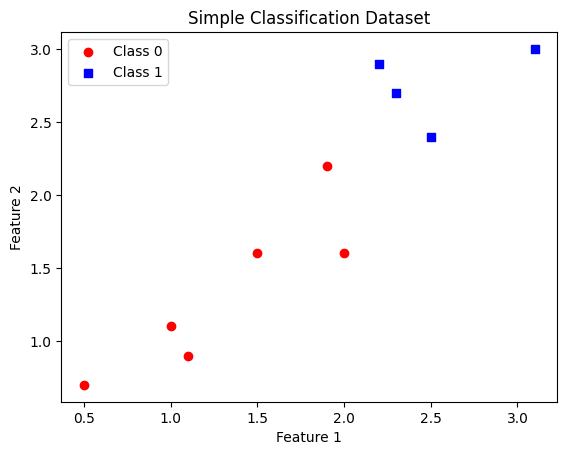

In [2]:
# creating simple classification dataset

classification_X = pd.DataFrame({
    'feature1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
    'feature2': [2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9],
    'label':    [1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
})

# creating testing data
X_test = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0],
    'feature2': [1.0, 2.0, 3.0]
})

y_test = pd.Series([0, 0, 1])


X = classification_X[['feature1', 'feature2']].values
y = classification_X['label'].values

# visualizing the two classes

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Simple Classification Dataset')
plt.show()

In [3]:
# optimizer
gradient_descent = GradientDescent(learning_rate=0.1)

# cost function
binary_crossentropy = BinaryCrossEntropy()

# model
logistic_regression = LogisticRegression(optimizer=gradient_descent, cost_function=binary_crossentropy)

In [4]:
# fitting the logistic regression model
logistic_regression.fit(X, y, epochs=1500)

Fitting the model using <Optimizers.GradientDescent.GradientDescent object at 0x7d13293e22a0> with <Losses.BinaryCrossEntropy.BinaryCrossEntropy object at 0x7d13293e2ae0> cost function.
Epoch 1/1500
Epoch 2/1500
Epoch 3/1500
Epoch 4/1500
Epoch 5/1500
Epoch 6/1500
Epoch 7/1500
Epoch 8/1500
Epoch 9/1500
Epoch 10/1500
Epoch 11/1500
Epoch 12/1500
Epoch 13/1500
Epoch 14/1500
Epoch 15/1500
Epoch 16/1500
Epoch 17/1500
Epoch 18/1500
Epoch 19/1500
Epoch 20/1500
Epoch 21/1500
Epoch 22/1500
Epoch 23/1500
Epoch 24/1500
Epoch 25/1500
Epoch 26/1500
Epoch 27/1500
Epoch 28/1500
Epoch 29/1500
Epoch 30/1500
Epoch 31/1500
Epoch 32/1500
Epoch 33/1500
Epoch 34/1500
Epoch 35/1500
Epoch 36/1500
Epoch 37/1500
Epoch 38/1500
Epoch 39/1500
Epoch 40/1500
Epoch 41/1500
Epoch 42/1500
Epoch 43/1500
Epoch 44/1500
Epoch 45/1500
Epoch 46/1500
Epoch 47/1500
Epoch 48/1500
Epoch 49/1500
Epoch 50/1500
Epoch 51/1500
Epoch 52/1500
Epoch 53/1500
Epoch 54/1500
Epoch 55/1500
Epoch 56/1500
Epoch 57/1500
Epoch 58/1500
Epoch 59/15

array([-6.97082172,  0.67755106,  2.56731267])

Predictions: [1 0 1 0 1 1 0 0 0 0]
Accuracy: 1.0


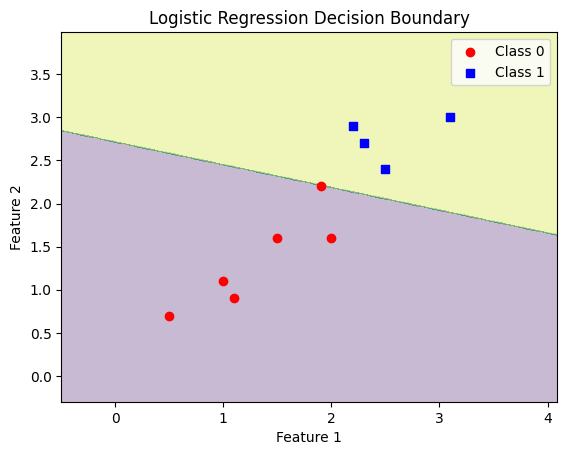

In [5]:
# evaluating the model
predictions = logistic_regression.predict(X)
print("Predictions:", predictions)

accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

# plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

Test Predictions: [0 0 1]
Test Actual Labels: [0 0 1]


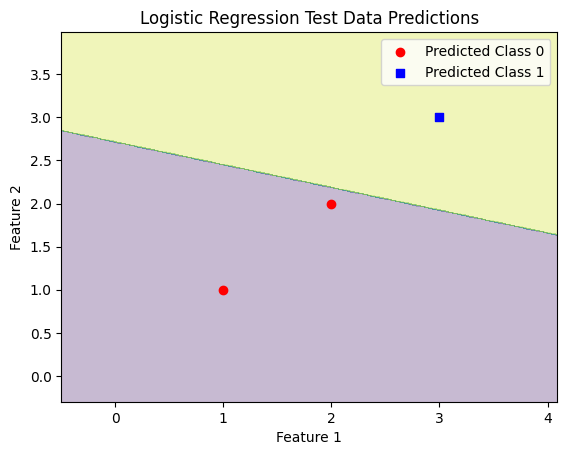

In [6]:
# evaluating on test data
test_predictions = logistic_regression.predict(X_test.values)
print("Test Predictions:", test_predictions)
print("Test Actual Labels:", y_test.values)

# plotting test data predictions with decision boundary
Z_test = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)
plt.contourf(xx, yy, Z_test, alpha=0.3)
plt.scatter(X_test.values[test_predictions == 0, 0], X_test.values[test_predictions == 0, 1], c='red', marker='o', label='Predicted Class 0')
plt.scatter(X_test.values[test_predictions == 1, 0], X_test.values[test_predictions == 1, 1], c='blue', marker='s', label='Predicted Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Test Data Predictions')
plt.show()

---
# Linear Regression

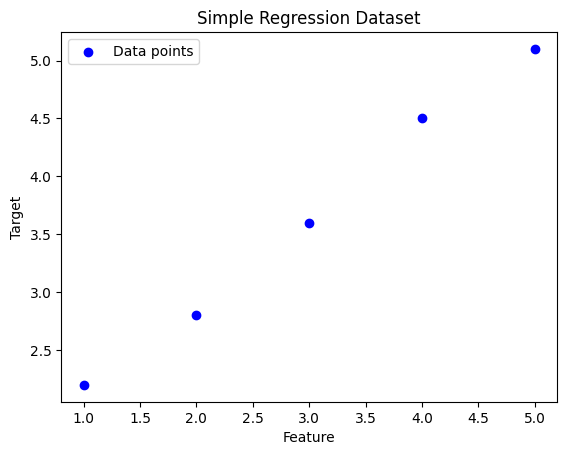

In [7]:
# creating simple regression dataset
regression_df = pd.DataFrame({
    'feature': [1, 2, 3, 4, 5],
    'target':  [2.2, 2.8, 3.6, 4.5, 5.1]
})
X_reg = regression_df[['feature']].values
y_reg = regression_df['target'].values

X_test_reg = pd.DataFrame({
    'feature': [1.5, 2.5, 3.5]
}).values
y_test_reg = pd.Series([2.5, 3.2, 4.0]).values

# visualizing the regression dataset
plt.scatter(X_reg, y_reg, c='blue', marker='o', label='Data points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Simple Regression Dataset')
plt.legend()
plt.show()



In [8]:
# optimizer
gradient_descent_reg = GradientDescent(learning_rate=0.01)

# cost function
mse = MSE()

# model
linear_regression = LinearRegression(optimizer=gradient_descent_reg, cost_function=mse)

In [9]:
# fitting the model
linear_regression.fit(X_reg, y_reg, epochs=1000)

Fitting the model using <Optimizers.GradientDescent.GradientDescent object at 0x7d1326f927b0> with <Losses.MSE.MSE object at 0x7d13295d6e10> cost function.
Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000

array([1.35286444, 0.76028595])

Predictions: [2.1131504  2.87343635 3.6337223  4.39400826 5.15429421]
Train MSE: 0.005651011138877877
Test Predictions: [2.49329337 3.25357933 4.01386528]
Test Actual Targets: [2.5 3.2 4. ]


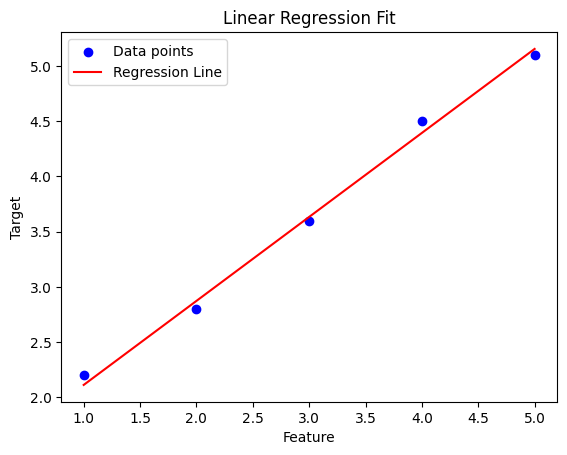

In [10]:
# evaluating the model
# use the regression input (X_reg) instead of the classification input (X)
predictions = linear_regression.predict(X_reg)
print("Predictions:", predictions)

# compute and print training MSE for the regression model
mse_train = np.mean((predictions - y_reg) ** 2)
print("Train MSE:", mse_train)

# evaluating on test data
test_predictions = linear_regression.predict(X_test_reg)
print("Test Predictions:", test_predictions)
print("Test Actual Targets:", y_test_reg)


#plotting the regression line
plt.scatter(X_reg, y_reg, c='blue', marker='o', label='Data points')
plt.plot(X_reg, predictions, color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

---
# KNN

In [11]:
# lets work on the same classification dataset with KNN
X_knn = X
y_knn = y

X_test_knn = X_test.values
y_test_knn = y_test.values

In [12]:
# model
knn = KNN(k_neighbors=3)

In [13]:
# fitting the model
knn.fit(X_knn, y_knn)

Predictions: [1 0 1 0 1 1 0 0 0 0]
Accuracy: 1.0
Test Predictions: [0 0 1]
Test Actual Labels: [0 0 1]


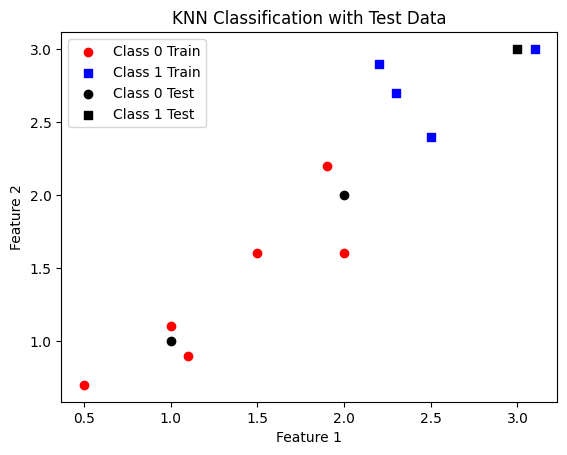

In [14]:
# evaluating the model
predictions = knn.predict(X_knn)
print("Predictions:", predictions)
accuracy = np.mean(predictions == y_knn)
print("Accuracy:", accuracy)

# evaluating on test data
test_predictions = knn.predict(X_test_knn)
print("Test Predictions:", test_predictions)
print("Test Actual Labels:", y_test_knn)

# plotting both classes with training data blue and test data orange
plt.scatter(X_knn[y_knn == 0, 0], X_knn[y_knn == 0, 1], c='red', marker='o', label='Class 0 Train')
plt.scatter(X_knn[y_knn == 1, 0], X_knn[y_knn == 1, 1], c='blue', marker='s', label='Class 1 Train')
plt.scatter(X_test_knn[test_predictions == 0, 0], X_test_knn[test_predictions == 0, 1], c='black', marker='o', label='Class 0 Test')
plt.scatter(X_test_knn[test_predictions == 1, 0], X_test_knn[test_predictions == 1, 1], c='black', marker='s', label='Class 1 Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('KNN Classification with Test Data')
plt.show()

---
# Linear Support Vector Machines

In [16]:
from Preprocessing.StandardScaler import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Use proper labels -1/1
y_svm = np.where(y == 0, -1, 1)

# lets work on the same classification dataset with KNN
X_Lsvm = X_scaled
y_Lsvm = y_svm

In [17]:
# optimizer
gradient_descent_Lsvm = GradientDescent(learning_rate=0.01)

# model
linear_svm = LinearSVM(optimizer=gradient_descent_Lsvm, C = 100.0)

In [18]:
# fitting the model
linear_svm.fit(X = X_Lsvm, y = y_Lsvm, epochs=1000)

Fitting the model using <Optimizers.GradientDescent.GradientDescent object at 0x7d1326ceb200> with SVMLoss cost function. (built in)
[ 1 -1  1 -1  1  1 -1 -1 -1 -1]
Epoch 1/1000
Weights: [-0.2         0.76787171  0.83680272]
Epoch 2/1000
Weights: [-0.498       0.76422029  0.86952769]
Epoch 3/1000
Weights: [-0.39302     0.92975195  1.14599286]
Epoch 4/1000
Weights: [-0.5890898   0.88286631  1.13702342]
Epoch 5/1000
Weights: [-0.6831989   0.9290774   1.18916053]
Epoch 6/1000
Weights: [-0.77636691  0.97482638  1.24077628]
Epoch 7/1000
Weights: [-0.76860324  1.0456241   1.25327336]
Epoch 8/1000
Weights: [-0.86091721  1.09020761  1.30424797]
Epoch 9/1000
Weights: [-0.85230804  1.15985152  1.31611034]
Epoch 10/1000
Weights: [-0.94378496  1.13617111  1.26683721]
Epoch 11/1000
Weights: [-0.93434711  1.20535538  1.27907368]
Epoch 12/1000
Weights: [-0.92500364  1.27384781  1.29118779]
Epoch 13/1000
Weights: [-1.0157536   1.24902743  1.24216389]
Epoch 14/1000
Weights: [-1.00559607  1.31708314  1.

array([-1.85733633,  2.09609762,  1.43597996])

Predictions: [ 1. -1.  1. -1.  1.  1. -1. -1. -1. -1.]
Accuracy: 1.0
Test Predictions: [-1. -1.  1.]
Test Predictions Original Labels: [0 0 1]


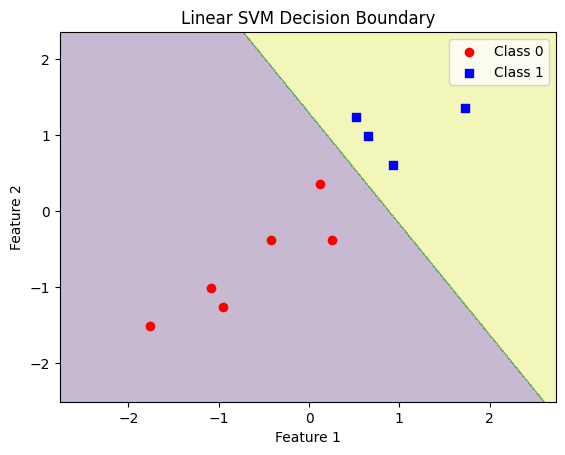

In [19]:
# evaluating the model
predictions = linear_svm.predict(X_Lsvm)
print("Predictions:", predictions)
accuracy = np.mean(predictions == y_Lsvm)
print("Accuracy:", accuracy)    
# evaluating on test data
test_predictions = linear_svm.predict(X_test_scaled)
print("Test Predictions:", test_predictions)
# converting back to original labels 0/1
test_predictions_original = np.where(test_predictions == -1, 0, 1)
print("Test Predictions Original Labels:", test_predictions_original)
# plotting decision boundary
x_min, x_max = X_Lsvm[:, 0].min() - 1, X_Lsvm[:, 0].max() + 1
y_min, y_max = X_Lsvm[:, 1].min() - 1, X_Lsvm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)  
plt.scatter(X_Lsvm[y_Lsvm == -1, 0], X_Lsvm[y_Lsvm == -1, 1], c='red', marker='o', label='Class 0')
plt.scatter(X_Lsvm[y_Lsvm == 1, 0], X_Lsvm[y_Lsvm == 1, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linear SVM Decision Boundary')
plt.show()